In [1]:
import sys
sys.path.append("../") # go to parent dir

import jax
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt
import module.chebyshev_solver as chb

import optax
from tqdm import tqdm

from scipy.optimize import curve_fit

In [3]:
Ns = jnp.arange(5, 15)

In [4]:
result = []
errs = []

In [5]:
for N in tqdm(Ns):
    solver = chb.Solver(N)
    xx = solver.xx
    yy = solver.yy
    grid = solver.grid
    dims = (solver.N, solver.N)
    mask = np.ones(dims)
    mask[1:-1,1:-1] = 0
    maskx = np.ones(dims)
    maskx[:,1:-1] = 0
    masky = np.ones(dims)
    masky[1:-1,:] = 0
    mask = jnp.array(mask)
    ii, jj = jnp.meshgrid(jnp.arange(solver.N), jnp.arange(solver.N))
    a = 1.4
    index_decay = jnp.exp(-(ii+jj)/a)


    k_init = xx + 3
    k_cheby_init = solver.invI @ k_init.flatten()


    dirichlet = yy * jnp.log(xx + 3)
    dirichlet *= mask


    sol = solver.solve(k_cheby_init, dirichlet)

    T_sol = yy * jnp.log(xx + 3)
    res = {"N":N,"solution":T_sol, "result":sol["T"].reshape(dims), "err":jnp.mean(jnp.abs(T_sol  - sol["T"].reshape(dims)))}
    errs.append(jnp.mean(jnp.abs(T_sol  - sol["T"].reshape(dims))))
    result.append(res)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
def f(x, a, b):
    return - a*x * np.log(x) + b

res = curve_fit(f, Ns, np.log(errs))

In [ ]:
a = res[0][0]
b = jnp.exp(res[0][1])

In [ ]:
a,b

(0.5362719472330162, Array(0.00010245, dtype=float64))

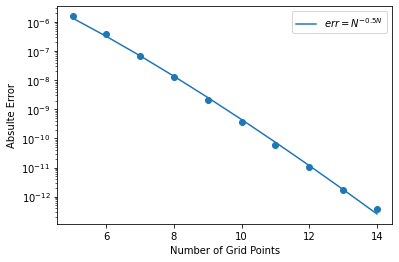

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(Ns, errs)
plt.plot(Ns, jnp.exp(f(Ns, res[0][0], res[0][1])), label = "$err = N^{-0.5N} $")
plt.yscale("log")
plt.xlabel("Number of Grid Points")
plt.ylabel("Absulte Error")
plt.legend()
plt.savefig("../plot/accuracy.pdf")